In [1]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

#import models
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# turn off warnings
import warnings
warnings.filterwarnings("ignore")

#functions for acquring, cleaning and splitting data
from acquire import get_telco_data
from prepare import prep_telco_data
from prepare import train_validate_test_split

# Questions

What services churn more?

Which contracts churn more?

Is churn related to cost for service?

Who is likely to churn?

Importing Data/Cleaning Data

In [205]:
telco_original = get_telco_data()
telco_original




,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,2,1,2,9987-LUTYD,Female,0,No,No,13,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,7040,2,1,1,9992-UJOEL,Male,0,No,No,2,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [3]:
telco_original.internet_service_type.value_counts()

Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64

In [5]:
telco = prep_telco_data()
telco.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,9,65.6,593.30,1,1,1,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,0,9,59.9,542.40,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,4,73.9,280.85,0,0,0,1,1,1,...,0,0,0,0,0,1,0,0,1,0
3,1,13,98.0,1237.85,0,1,0,1,1,1,...,1,0,1,0,0,1,0,0,1,0
4,1,3,83.9,267.40,1,1,0,1,1,1,...,1,0,0,0,0,1,0,0,0,1


In [5]:
telco.dtypes

senior_citizen                             int64
tenure                                     int64
monthly_charges                          float64
total_charges                            float64
gender_encoded                             int64
partner_encoded                            int64
dependents_encoded                         int64
phone_service_encoded                      int64
paperless_billing_encoded                  int64
churn_encoded                              int64
internet_service_encoded                   int64
contract_type_encoded                    float64
multiple_lines_No phone service            uint8
multiple_lines_Yes                         uint8
online_security_No internet service        uint8
online_security_Yes                        uint8
online_backup_No internet service          uint8
online_backup_Yes                          uint8
device_protection_No internet service      uint8
device_protection_Yes                      uint8
tech_support_No inte

In [6]:
train, validate, test = train_validate_test_split(telco, seed=123)
train

,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,0,58,71.10,4299.20,1,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
1915,0,71,85.45,6028.95,0,0,1,1,1,0,...,0,0,0,1,0,1,0,1,0,0
5054,0,35,25.75,882.55,1,1,1,1,1,0,...,0,1,0,0,0,0,1,0,1,0
2355,0,1,19.20,19.20,0,1,1,1,0,0,...,0,1,0,0,0,0,1,0,0,1
6279,1,20,54.00,1055.90,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,0,24,88.95,2072.75,1,0,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0
3763,0,10,100.25,1064.65,1,1,1,1,1,1,...,1,0,1,0,0,1,0,0,1,0
3444,0,22,25.25,555.40,1,1,1,1,0,0,...,0,1,0,0,1,0,1,1,0,0
1002,0,22,89.10,1949.40,0,0,1,1,1,0,...,1,0,0,0,0,1,0,1,0,0


<AxesSubplot:>

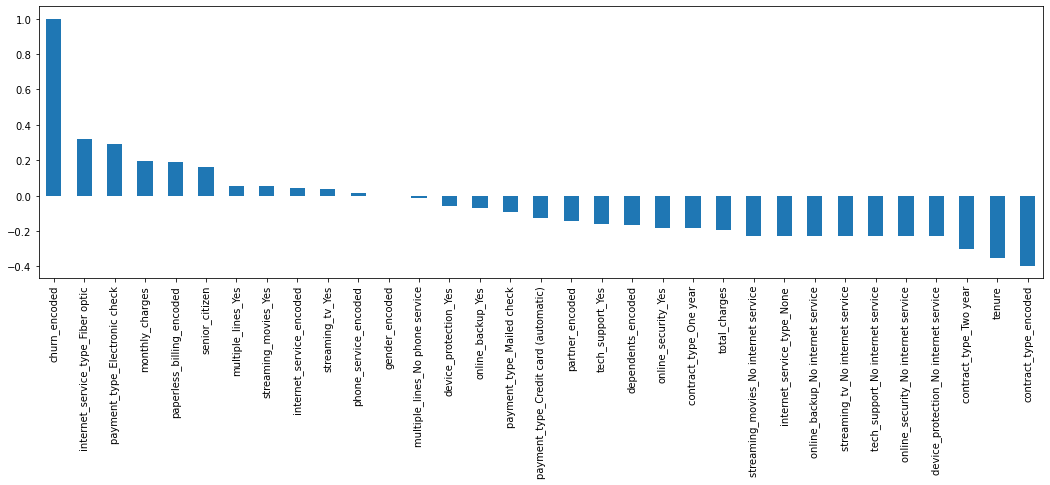

In [137]:
train.corr().churn_encoded.sort_values(ascending=False).plot(kind='bar', figsize=(18,5))

In [20]:
# What services churn more?
train.tenure.value_counts()

1     351
72    213
2     141
3     112
4     104
71    101
7      75
10     70
68     66
5      65
8      65
13     65
12     64
9      63
6      62
67     59
69     53
70     53
62     53
52     52
56     50
53     50
66     50
15     49
24     49
22     48
64     48
11     48
18     48
26     47
46     45
34     44
35     43
23     43
30     42
25     42
61     42
19     42
27     41
48     41
32     41
16     40
17     40
63     40
55     40
65     40
42     40
41     40
20     39
31     39
40     39
60     39
45     38
47     38
14     37
29     37
37     37
33     36
49     36
54     35
57     35
58     33
28     33
50     32
21     32
38     32
44     30
43     30
51     29
39     29
59     28
36     24
Name: tenure, dtype: int64

In [21]:
train.internet_service_encoded.value_counts()

1    1722
2    1348
0     867
Name: internet_service_encoded, dtype: int64

Text(0.5, 0, 'Churned')

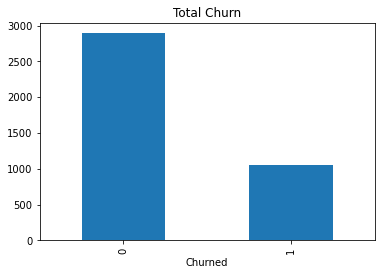

In [23]:
train.churn_encoded.value_counts().plot.bar()
plt.title("Total Churn")
plt.xlabel('Churned')

In [24]:
round(train.churn_encoded.mean(), 2)

0.27

Findings:

27% churn overall at Telco

[Text(0.5, 1.0, 'Fiber Optic Has Large Churn')]

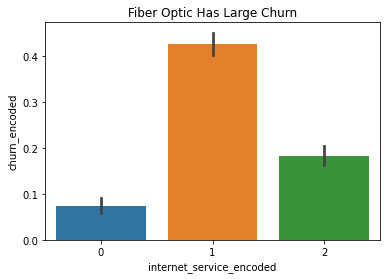

In [25]:
sns.barplot('internet_service_encoded', 'churn_encoded', data=train).set(title='Fiber Optic Has Large Churn')



[Text(0.5, 1.0, 'Fiber Optic Has Large Churn Pt.2')]

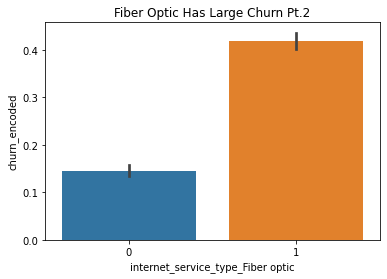

In [26]:
sns.barplot('internet_service_type_Fiber optic', 'churn_encoded', data=telco).set(title='Fiber Optic Has Large Churn Pt.2')



Findings:


Fiber optic has much more churn than DSL or non-internet customers

[Text(0.5, 1.0, 'Phone Service Has Little Difference In Churn')]

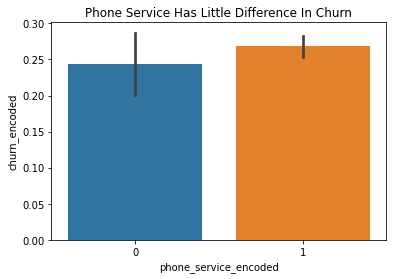

In [28]:
sns.barplot('phone_service_encoded', 'churn_encoded', data=train).set(title='Phone Service Has Little Difference In Churn')



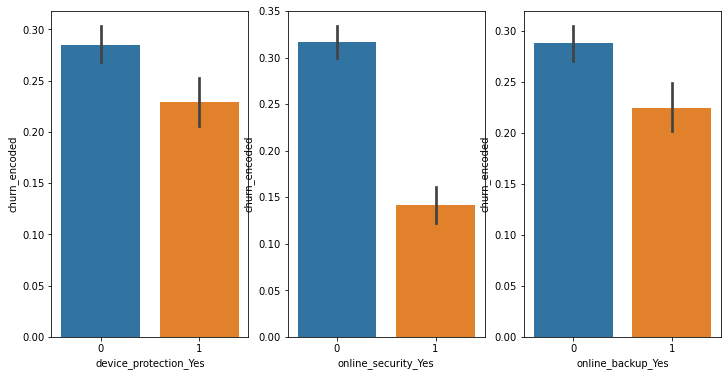

In [140]:
features = ['device_protection_Yes','online_security_Yes', 'online_backup_Yes'] # included columns
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

for i, feature in enumerate(features):
    sns.barplot(
        feature,
        "churn_encoded",
        data=train,
        ax=ax[i],
    )

Findings:

Device protection, online security and online backup have a low amount of churn


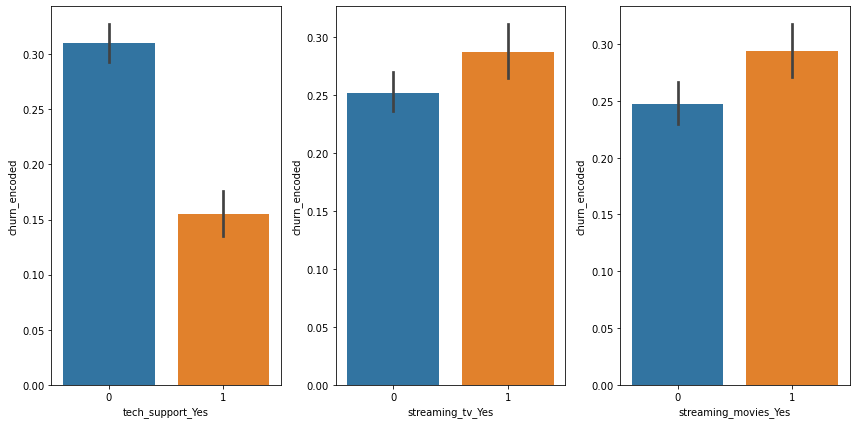

In [139]:
features = ['tech_support_Yes','streaming_tv_Yes', 'streaming_movies_Yes'] # included columns
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

for i, feature in enumerate(features): # looping through features
    sns.barplot(
        feature,
        "churn_encoded",
        data=train,
        ax=ax[i],
    )

    plt.tight_layout()

Findings:

Customers who have tech support have low churn

streaming services don't seem to have much variance in churn


Which contract types have more churn?

[Text(0.5, 1.0, 'Month to Month Has Large Churn')]

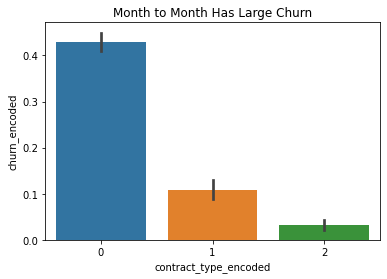

In [7]:
sns.barplot('contract_type_encoded', 'churn_encoded', data=train).set(title='Month to Month Has Large Churn')
#  0 = month-to-month, 1 = one year and 2 = two year

Month to Month has a large amount of churn in comparison to other contract types

In [8]:
train.tenure.value_counts() # looking at when customers tend to churn


1     351
72    213
2     141
3     112
4     104
71    101
7      75
10     70
68     66
5      65
8      65
13     65
12     64
9      63
6      62
67     59
69     53
70     53
62     53
52     52
56     50
53     50
66     50
15     49
24     49
22     48
64     48
11     48
18     48
26     47
46     45
34     44
35     43
23     43
30     42
25     42
61     42
19     42
27     41
48     41
32     41
16     40
17     40
63     40
55     40
65     40
42     40
41     40
20     39
31     39
40     39
60     39
45     38
47     38
14     37
29     37
37     37
33     36
49     36
54     35
57     35
58     33
28     33
50     32
21     32
38     32
44     30
43     30
51     29
39     29
59     28
36     24
Name: tenure, dtype: int64

In [9]:
train.tenure.max() # looking for maximum month for the data

72

(array([1724.,  735.,  561.,  538.,  473.,  444.,  452.,  495.,  501.,
        1109.]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <BarContainer object of 10 artists>)

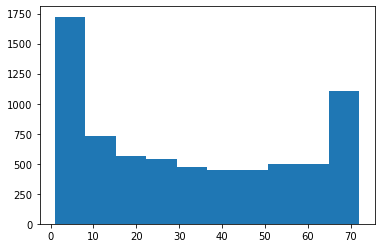

In [109]:
plt.hist(telco.tenure) # visualizing tenure



Findings

customers mostly churned early or stayed with the company for long periods of time

Is churn related to cost for service?

In [10]:
train.monthly_charges.mean() # finding average customer charges

64.80513081026147

In [105]:
telco.groupby('churn').monthly_charges.mean()
#Churning customers are paying more monthly

churn
No     61.307408
Yes    74.441332
Name: monthly_charges, dtype: float64

Who is likely to churn?

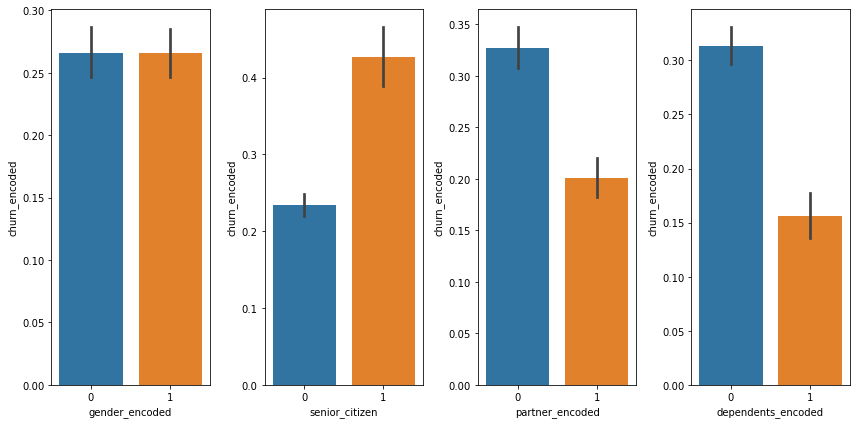

In [12]:
features = ['gender_encoded','senior_citizen', 'partner_encoded', 'dependents_encoded'] # included columns
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 6))

for i, feature in enumerate(features): # looping through features
    sns.barplot(
        feature,
        "churn_encoded",
        data=train,
        ax=ax[i],
    )

    plt.tight_layout()

Findings:


Gender plays no or little role in churn.

Senior citizens seem to have a large churn amount

people with partners and dependents tend to churn less

# Statistical Analysis

In [23]:
alpha = .05

## Internet services and options

### Fiber Optics 

H0: Churn is not dependent on fiber optic internet
H1: Churn is dependent on fiber optic internet

In [13]:


ct_fiber = pd.crosstab(train['churn_encoded'], train['internet_service_type_Fiber optic']) # crosstab compares churn and fiber internet service


chi2, p, degf, expected = stats.chi2_contingency(ct_fiber)  # Chi test to find observed, expected, chi2 and P values

print('Observed\n')
print(ct_fiber.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[1904  987]
 [ 311  735]]
---
Expected

[[1626.50876302 1264.49123698]
 [ 588.49123698  457.50876302]]
---

chi^2 = 405.9211
p     = 0.0000


In [129]:
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.") # Figuring out whether we are accepting or rejecting null

We reject the null hypothesis.


In [22]:
ct_os = pd.crosstab(train['churn_encoded'], train['online_security_Yes'])


chi2, p, degf, expected = stats.chi2_contingency(ct_os) # Chi test to find observed, expected, chi2 and P values

print('Observed\n')
print(ct_os.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.10f}')

Observed

[[1902  989]
 [ 883  163]]
---
Expected

[[2045.06858014  845.93141986]
 [ 739.93141986  306.06858014]]
---

chi^2 = 127.8458
p     = 0.0000000000


In [43]:
ct_cte = pd.crosstab(train.contract_type_encoded, train.churn_encoded)

chi2, p, degf, expected = stats.chi2_contingency(ct_cte) # Chi test to find observed, expected, chi2 and P values

print('Observed\n')
print(ct_cte.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.10f}')

Observed

[[1238  927]
 [ 726   89]
 [ 927   30]]
---
Expected

[[1589.79298959  575.20701041]
 [ 598.46710693  216.53289307]
 [ 702.73990348  254.26009652]]
---

chi^2 = 664.6572
p     = 0.0000000000


In [46]:
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.") # Figuring out whether we are accepting or rejecting null

We reject the null hypothesis.


In [41]:
ct_sc = pd.crosstab(train.senior_citizen, train.churn_encoded)

chi2, p, degf, expected = stats.chi2_contingency(ct_cte) # Chi test to find observed, expected, chi2 and P values
 
print('Observed\n')
print(ct_sc.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.10f}')

Observed

[[2527  775]
 [ 364  271]]
---
Expected

[[1589.79298959  575.20701041]
 [ 598.46710693  216.53289307]
 [ 702.73990348  254.26009652]]
---

chi^2 = 664.6572
p     = 0.0000000000


In [42]:
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.") # Figuring out whether we are accepting or rejecting null

We reject the null hypothesis.


In [35]:
ct_pe = pd.crosstab(train.partner_encoded, train.churn_encoded)

chi2, p, degf, expected = stats.chi2_contingency(ct_cte) # Chi test to find observed, expected, chi2 and P values

print('Observed\n')
print(ct_pe.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.10f}')

Observed

[[1364  663]
 [1527  383]]
---
Expected

[[1589.79298959  575.20701041]
 [ 598.46710693  216.53289307]
 [ 702.73990348  254.26009652]]
---

chi^2 = 664.6572
p     = 0.0000000000


In [36]:
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.") # Figuring out whether we are accepting or rejecting null

We reject the null hypothesis.


In [37]:
ct_de = pd.crosstab(train.dependents_encoded, train.churn_encoded)

chi2, p, degf, expected = stats.chi2_contingency(ct_cte) # Chi test to find observed, expected, chi2 and P values

print('Observed\n')
print(ct_de.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.10f}')

Observed

[[1885  860]
 [1006  186]]
---
Expected

[[1589.79298959  575.20701041]
 [ 598.46710693  216.53289307]
 [ 702.73990348  254.26009652]]
---

chi^2 = 664.6572
p     = 0.0000000000


In [38]:
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.") # Figuring out whether we are accepting or rejecting null

We reject the null hypothesis.


Doing Gender just to show a non-significant P value

In [39]:
ct_ge = pd.crosstab(train.gender_encoded, train.churn_encoded)

chi2, p, degf, expected = stats.chi2_contingency(ct_ge) # Chi test to find observed, expected, chi2 and P values

print('Observed\n')
print(ct_ge)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.10f}')

Observed

churn_encoded      0    1
gender_encoded           
0               1451  525
1               1440  521
---
Expected

[[1451.00736601  524.99263399]
 [1439.99263399  521.00736601]]
---

chi^2 = 0.0000
p     = 1.0000000000


In [40]:
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.") # Figuring out whether we are accepting or rejecting null

We fail to reject the null hypothesis.


### Tenure and contract type correlation

In [48]:
corr, p = stats.pearsonr(train.tenure, train.churn_encoded) # pearson test to find correlation and P values
corr, p

(-0.35180651322886447, 4.577513863527052e-115)

In [51]:
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.") # Figuring out whether we are accepting or rejecting null

We reject the null hypothesis.


In [65]:
corr, p = stats.pearsonr(train.monthly_charges, train.churn_encoded) # pearson test to find correlation and P values
corr, p

(0.19687086956798158, 1.0736272928947958e-35)

In [66]:
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.") # Figuring out whether we are accepting or rejecting null

We reject the null hypothesis.


Findings:

All of the features that were picked based on visualization were statistically significant, besides gender, and they will all be used in the modeling process.

In [64]:
train.columns

Index(['senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
       'gender_encoded', 'partner_encoded', 'dependents_encoded',
       'phone_service_encoded', 'paperless_billing_encoded', 'churn_encoded',
       'internet_service_encoded', 'contract_type_encoded',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'contract_type_One year', 'contract_type_Two year',
       'internet_service_type_Fiber optic', 'internet_service_type_None',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check'],
      d

In [167]:
x_vars = ['internet_service_type_Fiber optic','senior_citizen','partner_encoded',
 'dependents_encoded','tech_support_Yes','contract_type_encoded', 'tenure', 'monthly_charges']
y_vars = 'churn_encoded'

X_train, y_train = train[x_vars], train[y_vars]
x_validate, y_validate = validate[x_vars], validate[y_vars]
x_test, y_test = test[x_vars], test[y_vars]

In [96]:
baseline = y_train.mode() # setting baseline for comparison


In [97]:
matches_baseline_prediction = (y_train == 0) # setting prediction to 0

In [98]:
baseline_accuracy = matches_baseline_prediction.mean() # finding the baseline accuracy compared to prediction
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.73


In [127]:
rf = RandomForestClassifier(bootstrap=True,    # creating the random forest model with 6 samples and 15 max depth
                            class_weight=None, # Including all the features that were statistically relevant in the exploration process
                            criterion='gini',
                            min_samples_leaf=6,
                            n_estimators=100,
                            max_depth=15, 
                            random_state=123)

In [132]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_train)

In [73]:
print(rf.feature_importances_)

[0.10556416 0.02412349 0.01785892 0.01826182 0.0332779  0.21746749
 0.32026091 0.26318531]


In [76]:
print('Accuracy of random forest classifier on training set: {:.2f}' # finding accuracy of the training set
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.85


In [77]:
print(confusion_matrix(y_train, y_pred))

[[2705  186]
 [ 417  629]]


In [78]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2891
           1       0.77      0.60      0.68      1046

    accuracy                           0.85      3937
   macro avg       0.82      0.77      0.79      3937
weighted avg       0.84      0.85      0.84      3937



In [131]:
print('Accuracy of random forest classifier on test set: {:.2f}' # finding validation accuracy
     .format(rf.score(x_validate, y_validate))) 

Accuracy of random forest classifier on test set: 0.78


In [120]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [121]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

In [83]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.84


In [122]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(x_validate, y_validate)))

Accuracy of KNN classifier on training set: 0.75


In [123]:
logit1 = LogisticRegression(random_state=123)

In [124]:
logit1.fit(X_train, y_train)

LogisticRegression(random_state=123)

In [125]:
y_pred = logit1.predict(X_train)

In [94]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit1.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.79


In [126]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit1.score(x_validate, y_validate)))

Accuracy of Logistic Regression classifier on training set: 0.78


Testing the Random Forest model

In [165]:
rf = RandomForestClassifier(bootstrap=True,    # creating the random forest model with 6 samples and 15 max depth
                            class_weight=None, # Including all the features that were statistically relevant in the exploration process
                            criterion='gini',
                            min_samples_leaf=6,
                            n_estimators=100,
                            max_depth=15, 
                            random_state=123)

In [166]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_train)

In [134]:
print('Accuracy of random forest classifier on training set: {:.2f}' # finding accuracy of the training set
     .format(rf.score(x_test, y_test)))

Accuracy of random forest classifier on training set: 0.80


In [217]:
# making a table for model predictions
df = telco_original
df.drop(df.columns.difference(['customer_id']), 1, inplace=True)
df.customer_id.dropna()
df2 = prep_telco_data()
df2 = df2.drop(df2.columns.difference(['internet_service_type_Fiber optic','senior_citizen','partner_encoded',
 'dependents_encoded','tech_support_Yes','contract_type_encoded', 'tenure', 'monthly_charges']), 1, inplace=True)
#df2['probability_of_churn'] = rf.predict_proba(df2)
#df2['predicted'] = rf.predict(df2)
#df = pd.concat([df, df2], axis=1)
#df2['probability_of_churn'] = rf.predict_proba(df)
#df2['predicted'] = rf.predict(df)
#df2['probability_of_churn'] = rf.predict_proba(df)
#df2['predicted'] = rf.predict(df)

In [218]:
df2

In [207]:
df

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,2,1,2,9987-LUTYD,Female,0,No,No,13,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,7040,2,1,1,9992-UJOEL,Male,0,No,No,2,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [155]:
# Saving the model prediction table as a csv
df.to_csv('predictions.csv')